In [1]:
pip install scikeras[tensorflow] # уже установлен

In [2]:
pip install mnist

In [3]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [5]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

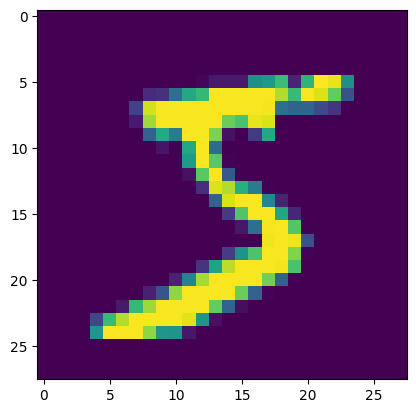

In [6]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255)
mnist.train_images()[1]/255
to_categorical(train_labels)
#train_labels

In [7]:
input_shape = (28, 28, 1)

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [12]:
model_2.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 1s 6ms/step - loss: 0.5461 - accuracy: 0.8537
Epoch 2/10
120/120 [==============================] - 1s 6ms/step - loss: 0.2359 - accuracy: 0.9333
Epoch 3/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1804 - accuracy: 0.9472
Epoch 4/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1471 - accuracy: 0.9573
Epoch 5/10
120/120 [==============================] - 1s 6ms/step - loss: 0.1229 - accuracy: 0.9636
Epoch 6/10
120/120 [==============================] - 1s 9ms/step - loss: 0.1046 - accuracy: 0.9696
Epoch 7/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0920 - accuracy: 0.9729
Epoch 8/10
120/120 [==============================] - 1s 9ms/step - loss: 0.0804 - accuracy: 0.9767
Epoch 9/10
120/120 [==============================] - 1s 6ms/step - loss: 0.0725 - accuracy: 0.9786
Epoch 10/10
120/120 [==============================] - 1s 7ms/step - loss: 0.0644 - accuracy: 0.980

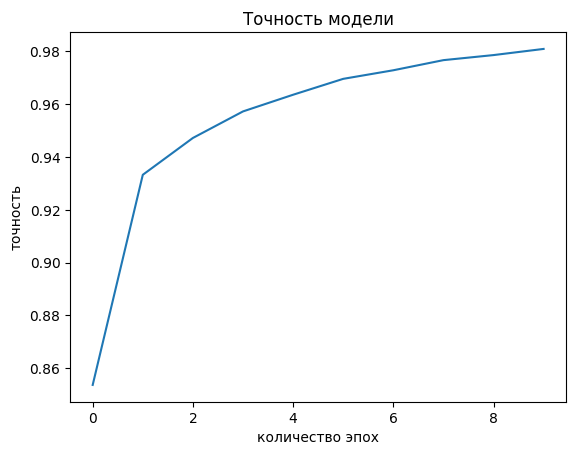

In [14]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

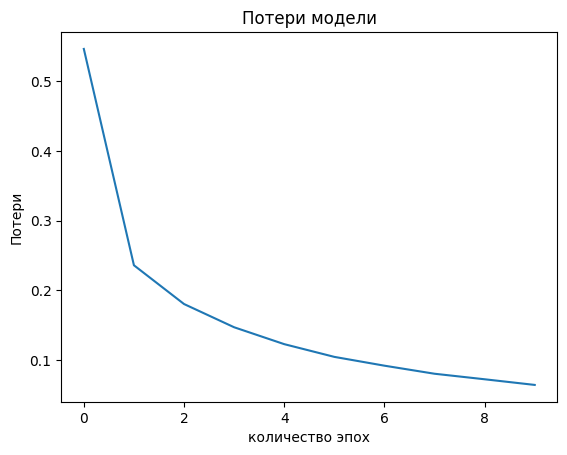

In [15]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [16]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9747


[0.08742018789052963, 0.9746999740600586]

In [17]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9742 - val_loss: 0.1070 - val_accuracy: 0.9686
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9781 - val_loss: 0.1084 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.1038 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0551 - accuracy: 0.9843 - val_loss: 0.1217 - val_accuracy: 0.9673
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.1112 - val_accuracy: 0.9744
CPU times: user 29.2 s, sys: 1.93 s, total: 31.1 s
Wall time: 25.4 s


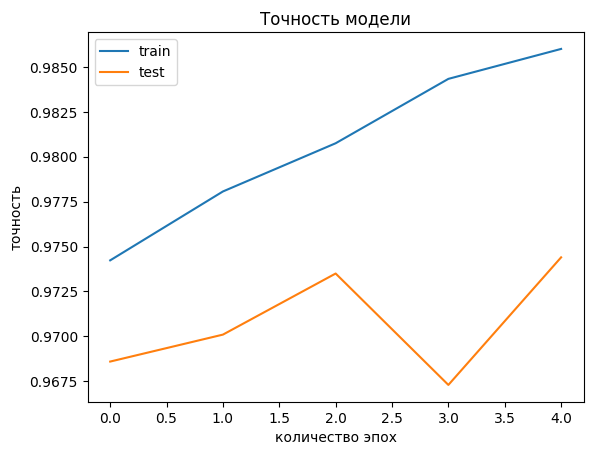

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

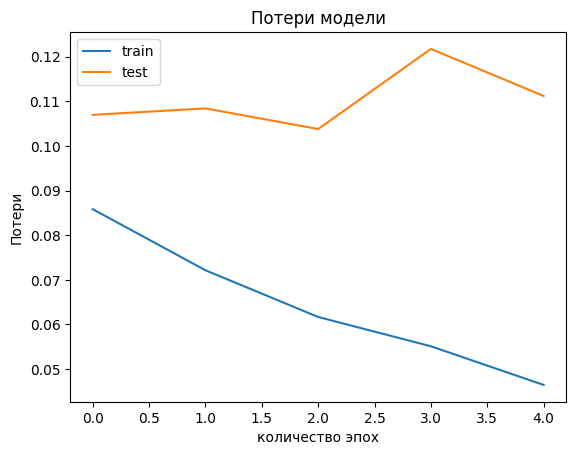

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

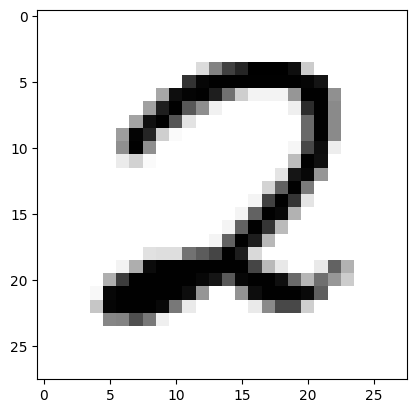

1/1 [==============================] - 0s 74ms/step
1: 2


In [20]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [21]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [22]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0983 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1006 - accuracy: 0.9699
**************
Loss - 0.1, Metrics - 0.97


In [23]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

1/1 [==============================] - 0s 45ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


#ДОМАШНЕЕ ЗАДАНИЕ


In [ ]:
# меняю оптимизатор, добавляю слой с увеличенным числом нейронов

Входной слой со 128 нейронами и активацией ReLU принимает входные данные с размерностью 784 (размер изображения).
Второй слой с 64 нейронами и активацией.
Выходной слой с 10 нейронами и активацией softmax используется для классификации.На выходе ожидается 10 классов.

In [24]:

def my_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [25]:
dz_model = my_model()
dz_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [26]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:

dz_model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model.
loss,metrics = dz_model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2707 - accuracy: 0.9215 - val_loss: 0.1572 - val_accuracy: 0.9520
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1173 - accuracy: 0.9652 - val_loss: 0.1010 - val_accuracy: 0.9707
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0808 - accuracy: 0.9760 - val_loss: 0.1115 - val_accuracy: 0.9697
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0656 - accuracy: 0.9809 - val_loss: 0.0988 - val_accuracy: 0.9744
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0941 - accuracy: 0.9760
**************
Loss - 0.09, Metrics - 0.976


In [28]:
model_2 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/3
750/750 [==============================] - 2s 3ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch 2/3
750/750 [==============================] - 3s 3ms/step - loss: 0.0361 - accuracy: 0.9894 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9736
**************
Loss - 0.09, Metrics - 0.974


In [29]:
model_3 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9946 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 2/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.0445 - val_accuracy: 0.9872
Epoch 3/7
375/375 [==============================] - 1s 4ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.0455 - val_accuracy: 0.9871
Epoch 4/7
375/375 [==============================] - 2s 5ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 5/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0538 - val_accuracy: 0.9847
Epoch 6/7
375/375 [==============================] - 1s 3ms/step - loss: 0.0124 - accuracy: 0.9973 - val_loss: 0.0524 - val_accuracy: 0.9851
Epoch 7/7
313/313 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9733
**************
Loss - 0.1, Metrics - 0.973


In [30]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:20]}')

1/1 [==============================] - 0s 19ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [33]:
#batch_size = [70, 80, 90]
batch_size = [100]
epochs = [3, 5]
#epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [34]:
model = KerasClassifier(my_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')
grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/3
400/400 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.8967
Epoch 2/3
400/400 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9501
Epoch 3/3
200/200 [==============================] - 0s 2ms/step
Epoch 1/3
400/400 [==============================] - 2s 3ms/step - loss: 0.3566 - accuracy: 0.8989
Epoch 2/3
400/400 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.9541
Epoch 3/3
200/200 [==============================] - 0s 2ms/step
Epoch 1/3
400/400 [==============================] - 2s 4ms/step - loss: 0.3727 - accuracy: 0.8941
Epoch 2/3
400/400 [==============================] - 1s 3ms/step - loss: 0.1613 - accuracy: 0.9519
Epoch 3/3
200/200 [==============================] - 0s 2ms/step
Epoch 1/3
400/400 [==============================] - 2s 3ms/step - loss: 0.3590 - accuracy: 0.8969
Epoch 2/3
400/400 [==============================] - 1s 3ms/step - loss: 0.1579 - accuracy: 0.9536
Epoch 3/3
200

In [35]:
print(grid_result.best_score_, grid_result.best_params_)

0.9689333333333333 {'batch_size': 100, 'epochs': 5, 'optimizer': 'RMSprop'}


In [36]:
df = pd.DataFrame(grid_result.cv_results_)

In [37]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
2,100,5,RMSprop,0.968933
3,100,5,Adam,0.967050
1,100,3,Adam,0.961917
0,100,3,RMSprop,0.960800


Выводы:
1 Введение дополнительного скрытого слоя улучшает точность НС.   
2 Умеренное увеличение количества эпох улучшает точность НС.   
3 Увеличение batch_size ускоряет обучение НС.      
4 Наличие валидационной выборки препятствует переобучению.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')